# Supervised Learning
## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
print(sklearn.__version__)

1.5.2


A Machine Learning experiment implies a number of steps:

1. Collect the data (or download it), annotate, pre-process, inspect, visualize, ...
2. Divide into train and test
3. Train (fit) the model on the train data
4. Use the model to predict the output of the unseen (by the model) test data and evaluate the performance of the model on the test data by comparing the output of the model with the 'true' output (gold standard)

## 1. Data collection and inspection
We load the real_estate dataset (origin = Kaggle): pandas has read methods for csv, excel etc.
https://www.kaggle.com/quantbruce/real-estate-price-prediction?select=Real+estate.csv#

Refer to https://pandas.pydata.org/docs/user_guide/io.html#io for other types of Pandas readers and writers.

You can find some more information about the dataset here: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

The inputs:

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
X2=the house age (unit: year)
X3=the distance to the nearest MRT station, MRT = Taipei Mass Rapid Transit (unit: meter)
X4=the number of convenience stores in the living circle on foot (integer)
X5=the geographic coordinate, latitude (unit: degree)
X6=the geographic coordinate, longitude (unit: degree)
The output:

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [2]:
# loading the dataset in the pandas dataframe
df = pd.read_csv("data/real_estate.csv")


In [3]:
#Check whats in the dataset by df.head() or df.tail()
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Using more suitable features name
df.columns = ['No', 'Date', 'Age', 'Distance', 'Stores', 'Lat', 'Long', 'Price']

#Checking the columns name
df.head()

,No,Date,Age,Distance,Stores,Lat,Long,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# provide the descriptive statistical properties for each feature
df.describe()

,No,Date,Age,Distance,Stores,Lat,Long,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
#Information about the datatypes of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        414 non-null    int64  
 1   Date      414 non-null    float64
 2   Age       414 non-null    float64
 3   Distance  414 non-null    float64
 4   Stores    414 non-null    int64  
 5   Lat       414 non-null    float64
 6   Long      414 non-null    float64
 7   Price     414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
# .describe() produces a new pandas dataframe or series
d = df.describe()
print(d['Price'])
print(type(d['Price']))

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Price, dtype: float64
<class 'pandas.core.series.Series'>


### Reminder: box plots

Descriptive statistics using a box plot: 
- Median (50th percentile)
- Q1 (25th percentile)
- Q3 (75th percentile)
- Distance between Q1 and Q3 (interquartile range)
- Minimum (Q1 - 1.5 IQR) (bottom whisker)
- Maximum (Q3 + 1.5 IQR) (top whisker)
- Outliers

<Axes: >

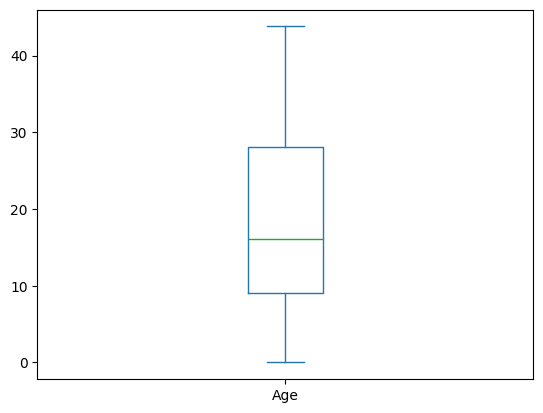

In [8]:
df['Age'].plot(kind='box')

In [9]:
df.isnull().sum()

No          0
Date        0
Age         0
Distance    0
Stores      0
Lat         0
Long        0
Price       0
dtype: int64

In [10]:
imp_columns = ['Date','Age', 'Distance', 'Stores', 'Lat', 'Long', 'Price' ]

In [11]:
#Looking at correlation between features to look for highly informative features and redundancy
df[imp_columns].corr()

,Date,Age,Distance,Stores,Lat,Long,Price
Date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
Age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Lat,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Long,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


## Visualize Data

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Stores'}>,
        <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Long'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

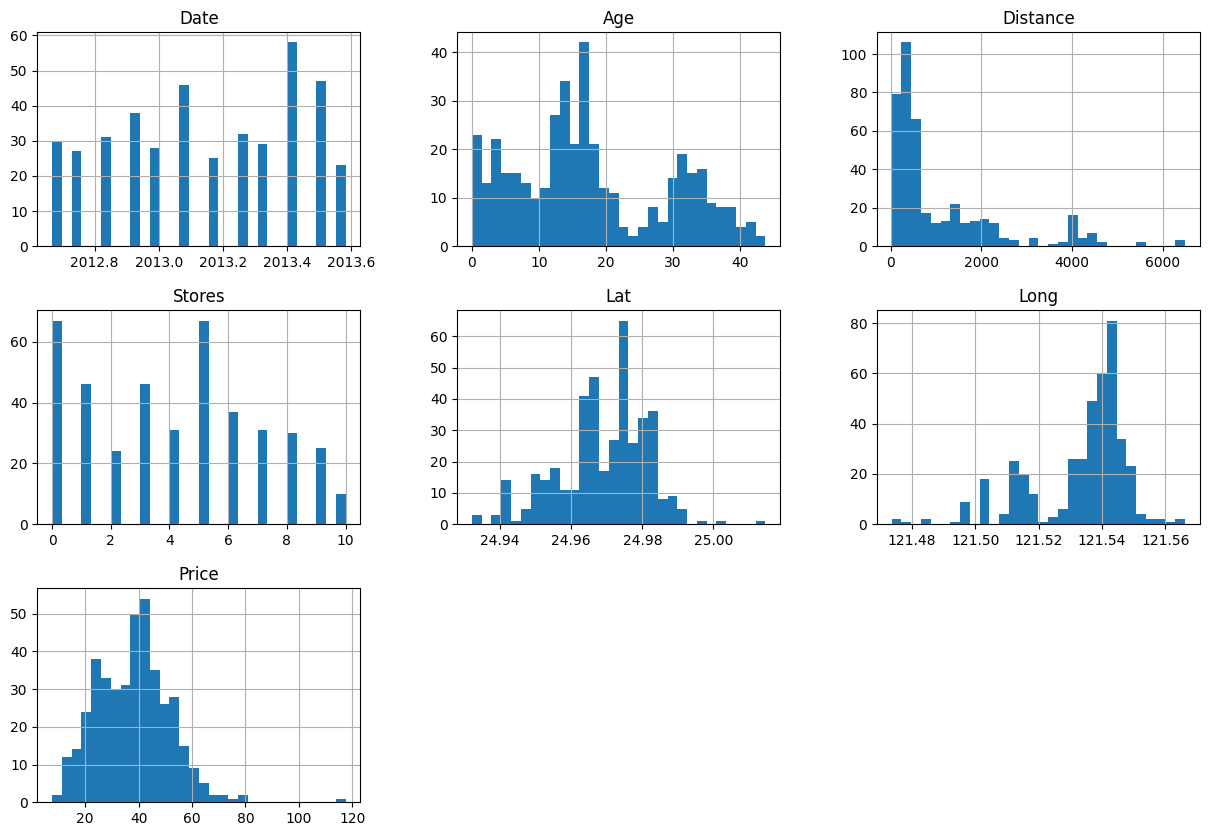

In [12]:
# By looking at histograms, we can get a sense of the distribution of our data(normal or not, uni or multi-modal,...)
pd.plotting.hist_frame(df[imp_columns], figsize=(15, 10), bins=30)

array([[<Axes: xlabel='Date', ylabel='Date'>,
        <Axes: xlabel='Age', ylabel='Date'>,
        <Axes: xlabel='Distance', ylabel='Date'>,
        <Axes: xlabel='Stores', ylabel='Date'>,
        <Axes: xlabel='Lat', ylabel='Date'>,
        <Axes: xlabel='Long', ylabel='Date'>,
        <Axes: xlabel='Price', ylabel='Date'>],
       [<Axes: xlabel='Date', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Distance', ylabel='Age'>,
        <Axes: xlabel='Stores', ylabel='Age'>,
        <Axes: xlabel='Lat', ylabel='Age'>,
        <Axes: xlabel='Long', ylabel='Age'>,
        <Axes: xlabel='Price', ylabel='Age'>],
       [<Axes: xlabel='Date', ylabel='Distance'>,
        <Axes: xlabel='Age', ylabel='Distance'>,
        <Axes: xlabel='Distance', ylabel='Distance'>,
        <Axes: xlabel='Stores', ylabel='Distance'>,
        <Axes: xlabel='Lat', ylabel='Distance'>,
        <Axes: xlabel='Long', ylabel='Distance'>,
        <Axes: xlabel='Price', ylabel='Distance

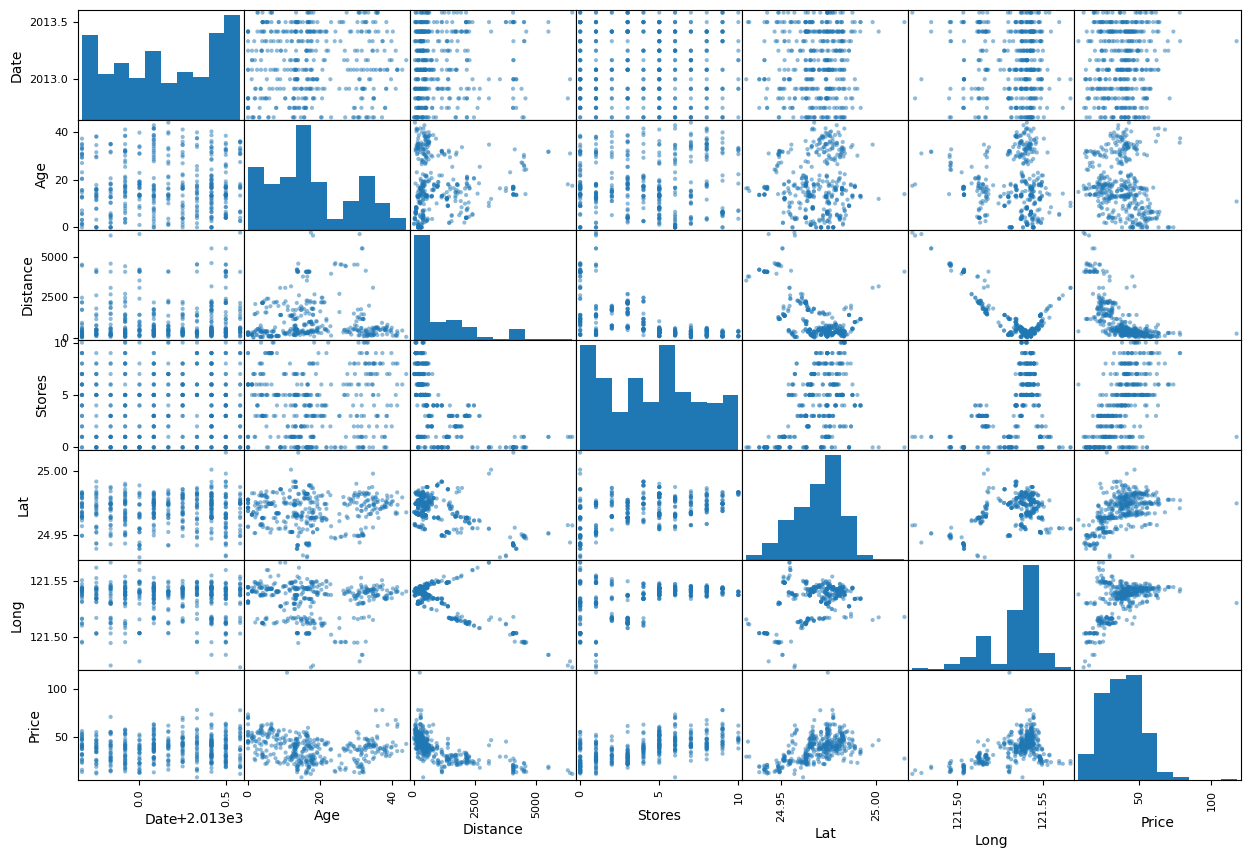

In [13]:
# Plotting scatter plot 
pd.plotting.scatter_matrix(df[imp_columns], figsize=(15, 10))

<Axes: xlabel='Age', ylabel='Price'>

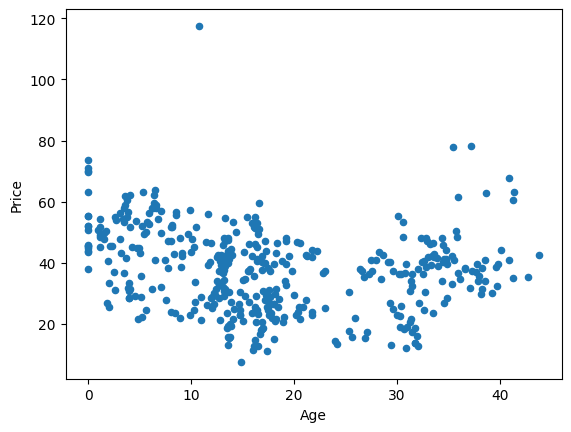

In [14]:
# By looking at scatter plots, we can inspect the distribution of values of a feature over the price output value
# Linear regression will find the trendline for this data and the trendline will be the model
df.plot(kind='scatter', x='Age', y='Price')

# 2. Define input and output

We will investigate the relation between Age and Price. Can we predict on the basis of Age of the house.
* We divide the relevent data into a train and test partititon
* We will train the model on train, and test on the unseen test data(for which we do not know the correct output, i.e. the gold standard)
* we compare the predicted output to the gold standard output

In [15]:
from sklearn.model_selection import train_test_split

### Create Datasets

In [16]:
# Define the input values
X = df[['Age']]

In [17]:
len(X)

414

In [18]:
y = df['Price']

In [19]:
len(y)

414

In [20]:
# Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size= .33)


In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((277, 1), (277,), (137, 1), (137,))

In [22]:
X_train.head()

,Age
396,37.1
239,18.1
83,25.3
168,27.6
323,28.6


In [23]:
y_train.head()

396    31.9
239    29.7
83     17.7
168    37.4
323    42.5
Name: Price, dtype: float64

In [24]:
X_test.head()

,Age
358,1.1
350,13.2
373,0.0
399,12.7
369,20.2


In [25]:
y_test.head()

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
Name: Price, dtype: float64

# 3. Train(fit) the model

## Linear Regression

* it is a regression(output is a number)
* Can be Univariate or multiple(one or more input features/ independent variables; one output class/dependent variable)
* The model is a straight line, hence linear, on the data points
* A straight line has as definition: 
    - f(x) = predicted y = $wx + b$
    - A line is defined by two values: the intercept (b, where it crosses y-axis), and the coefficient or weight (w) determining the slope and direction of the line
    - Or for the case with more than one feature: $w_1x_1 + w_2x_2 +  ...  + w_nx_n + b$

In [26]:
# Import the right submodule
from sklearn.linear_model import LinearRegression

In [27]:
# Create a linear regression instance with default hyperparameters
lr = LinearRegression()

In [28]:
# Train(fit) the model on the data (supervised, so X and y are given)
lr.fit(X_train, y_train)

LinearRegression()

Our model is now fit on the training data and has looked for the coefficient(w) and intercept(b) in the line y = wx + b that best fit the datapoints.
We can inspect the solution by looking at lr.coef_ and lr.intercept(the underscore at the end means in sklearn that this variable was computed during fitting and is only available after fitting has been done)

In [29]:
# the slope and direction
lr.coef_ 

array([-0.2556221])

In [30]:
# the y-value at x-value 0
lr.intercept_

np.float64(43.084969375948376)

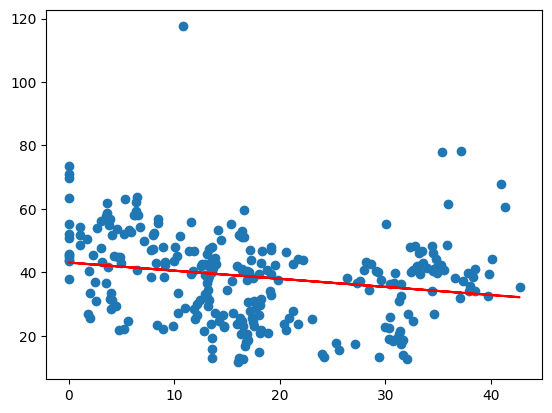

In [31]:
# We plot the model (the red line) on the scatterplot of the training data (a subset of the complete dataset!)
x = X_train['Age']
y = y_train
plt.scatter(x, y)
coef = lr.coef_[0]
intercept= lr.intercept_
plt.plot(x, x * coef +lr.intercept_, color='Red')

# 4. Evaluate the model


In [32]:
# We can make predictions for different house ages
print(lr.predict([[1]])) # Price ofa brand new house
print(lr.predict([[150]]))

[42.82934728]
[4.74165466]


/Users/Moni_Uni/ML_UA/ML_UA/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/Moni_Uni/ML_UA/ML_UA/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# the linear regression also estimates its performance on the train data
lr.score(X_train, y)

0.043441982733742446

The score ($R^2$) how well the model fits the *training* data.

This `coefficient of determination` $R^2$ is defined as
        $(1 - \frac{u}{v})$, where $u$ is the residual
        sum of squares `((y_true - y_pred) ** 2).sum()` and $v$
        is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`.
        The best possible score is 1.0 (all train items predicted perfectly) and it can be negative (if it does worse than always predicting the mean). A model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of 0.0.
        
Explanation in sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

$R^2$ represents the proportion of variance (of y) that has been explained by the independent variable (input) in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples *are likely* to be predicted by the model, through the proportion of explained variance.

Of course, the interesting value of $R^2$ is the one on unseen (test) data.  


## Evaluating the model on test data

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

MSE computes the average of the squared differences between predicted value and gold standard value. Lower is better!

In [35]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([42.80378507, 39.71075768, 43.08496938, 39.83856873, 37.92140299,
       34.77725119, 39.02057802, 38.94389139, 34.93062445, 41.39786353,
       36.61773029, 42.06248098, 41.78129668, 34.98174887, 33.21795639,
       39.32732453, 34.49606688, 42.21585424, 38.66270708, 39.22507569,
       35.18624654, 38.50933382, 41.70461005, 39.60850884, 39.63407105,
       39.83856873, 38.94389139, 43.08496938, 32.63002556, 32.52777672,
       36.46435703, 41.78129668, 34.72612677, 38.48377161, 38.86720476,
       33.44801628, 41.576799  , 39.58294663, 35.26293317, 32.50221451,
       33.95926047, 37.64021869, 34.90506224, 39.09726465, 39.7618821 ,
       40.5543106 , 38.56045824, 39.48069779, 42.70153623, 34.67500235,
       42.80378507, 42.1136054 , 34.06150931, 36.05536168, 35.36518201,
       39.55738442, 33.85701163, 39.58294663, 37.84471636, 38.94389139,
       41.14224143, 35.5952419 , 39.55738442, 36.20873494, 38.63714487,
       38.53489603, 39.32732453, 37.53796985, 33.32020523, 40.01

In [37]:
r2_score(y_test, y_test_pred)

0.025404480183082057

In [38]:
mean_squared_error(y_test, y_test_pred)

np.float64(156.32530415748332)

### So our conclusion can only be that the Age of the house alone is not a very good predictor of its price: it only explains a small part of the variance of the price and provides a large MSE on unseen data.

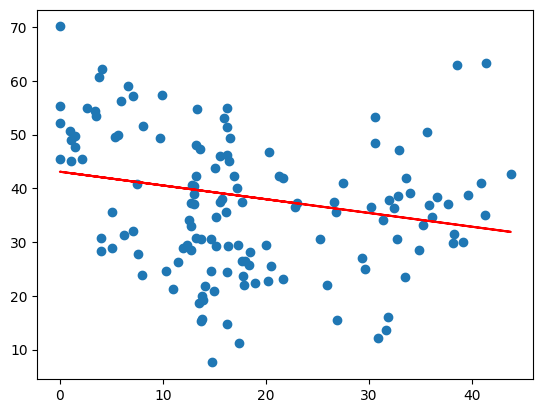

In [40]:
# Visualization of the model on the test data
x =  X_test['Age']
y = y_test
plt.scatter(x, y)
coef = lr.coef_[0]
intercept = lr.intercept_
plt.plot(x, x * coef +lr.intercept_, color='Red')